Enhanced analysis with different x values:
x = 2.0: Optimal truncation at 2 terms, error = 0.018817989036605587
x = 3.0: Optimal truncation at 1 terms, error = 0.012617584590109865
x = 5.0: Optimal truncation at 2 terms, error = 0.005249707995510722
x = 10.0: Optimal truncation at 1 terms, error = 0.0006606268802415438


┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict

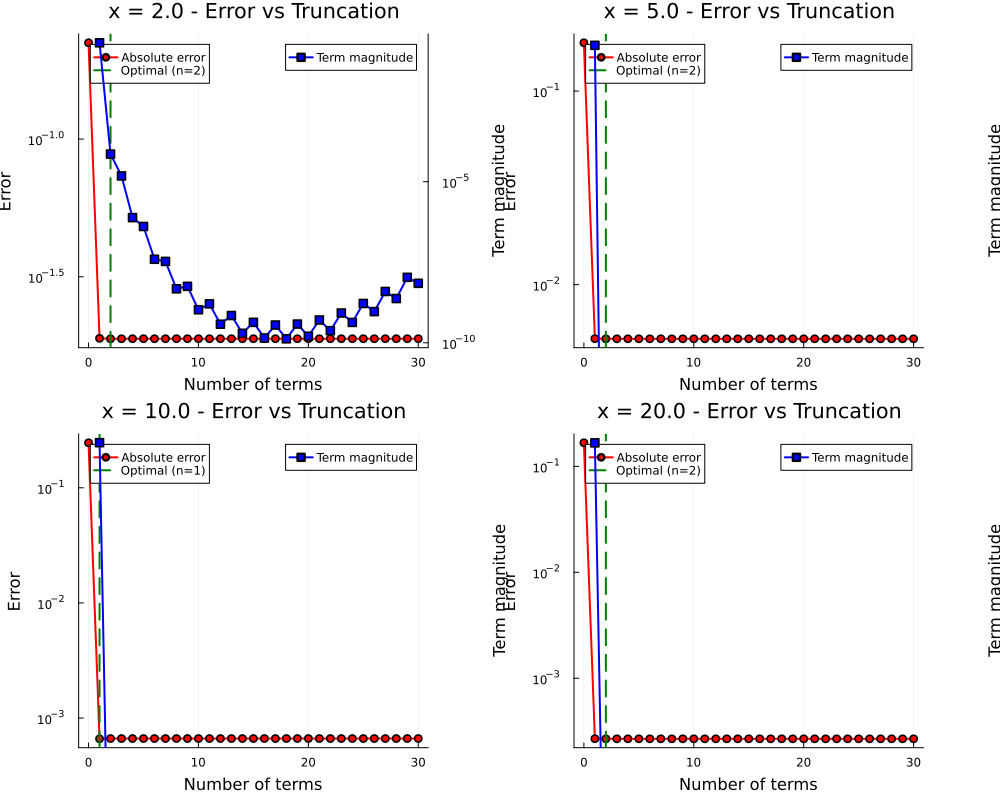

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict

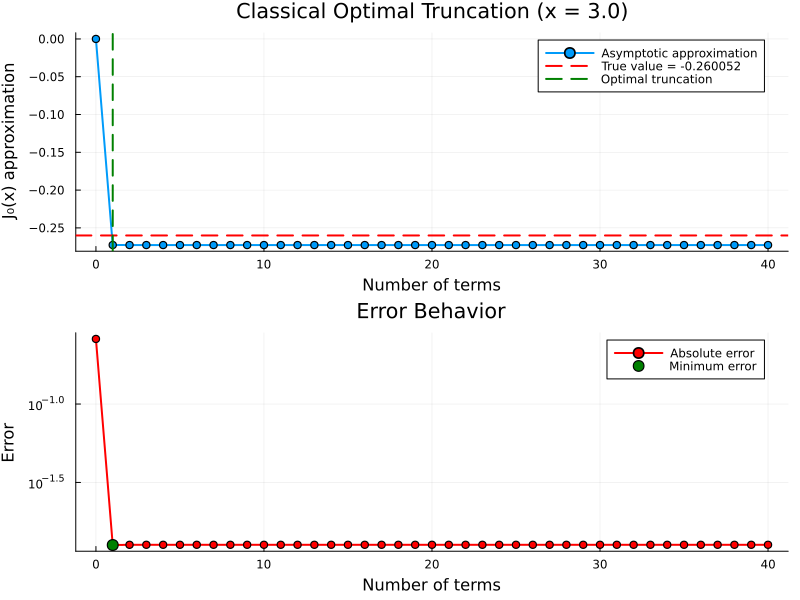

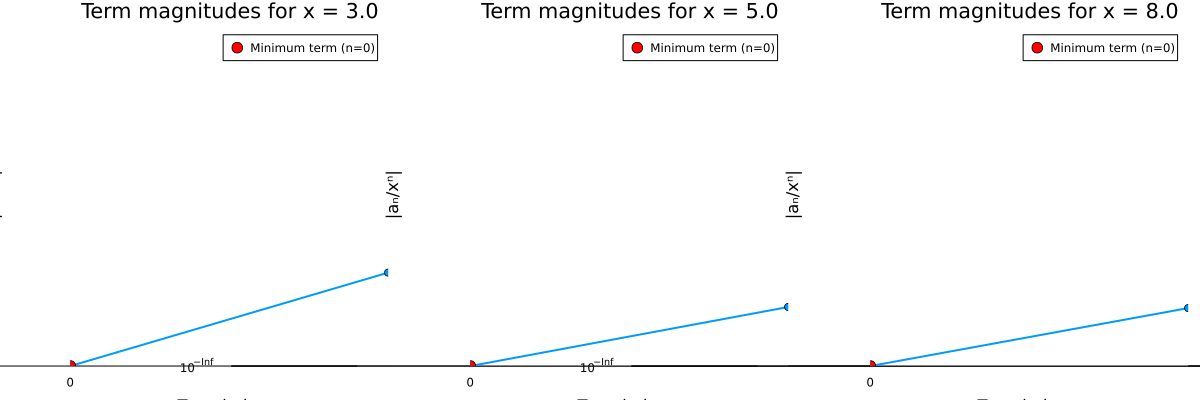

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots ~/.julia/packages/Plots/MR7sb/src/utils.jl:106
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots ~/.julia/packages/Plots/MR7sb/src/utils.jl:106
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots ~/.julia/

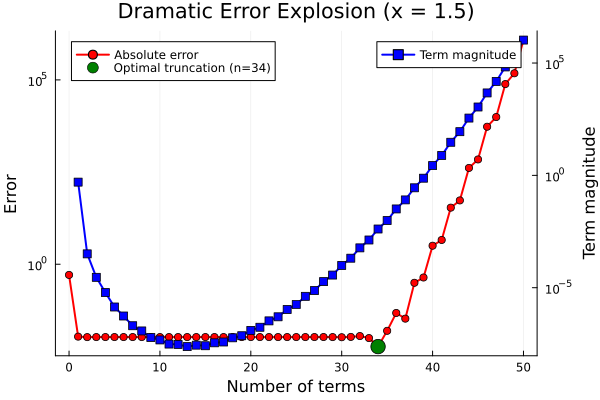

In [2]:
using Plots, SpecialFunctions

# Coefficients for the asymptotic expansion
function a_coefficient(k)
    # a_k = [ (1/2)_k * (-1/2)_k ] / (k! * 8^k)
    result = 1.0
    for i in 0:k-1
        result *= (1/2 + i) * (-1/2 + i) / ((i + 1) * 8.0)
    end
    return result
end

# Asymptotic expansion for J₀(x) truncated at N terms
function J0_asymptotic(x, N)
    if x == 0
        return 1.0
    end
    
    prefactor = sqrt(2/(π*x))
    phase = x - π/4
    
    cos_sum = 0.0
    for m in 0:min(N-1, 100)  # Upper limit for safety
        if 2m > N break end
        term = ((-1)^m * a_coefficient(2m)) / x^(2m)
        cos_sum += term
    end
    
    sin_sum = 0.0
    for m in 0:min(N-1, 100)
        if 2m+1 > N break end
        term = ((-1)^m * a_coefficient(2m+1)) / x^(2m+1)
        sin_sum += term
    end
    
    return prefactor * (cos(phase) * cos_sum - sin(phase) * sin_sum)
end

J0_true(x) = besselj0(x)

function analyze_truncation(x, max_terms=50)
    true_value = J0_true(x)
    errors = Float64[]
    approximations = Float64[]
    terms = Float64[]  # Store individual term magnitudes
    
    for n in 0:max_terms
        approx = J0_asymptotic(x, n)
        push!(approximations, approx)
        error_val = abs(approx - true_value)
        push!(errors, error_val)
        
        # Calculate the magnitude of the nth term
        if n > 0
            term_mag = abs(J0_asymptotic(x, n) - J0_asymptotic(x, n-1))
            push!(terms, term_mag)
        else
            push!(terms, abs(approx))
        end
    end
    
    return approximations, errors, terms
end

function find_optimal_truncation(x, max_terms=50)
    _, errors, _ = analyze_truncation(x, max_terms)
    optimal_n = argmin(errors) - 1  # -1 because Julia arrays are 1-indexed
    return optimal_n, errors[optimal_n+1]
end

# Enhanced plotting function
function plot_enhanced_truncation()
    # Test smaller x values to see more dramatic behavior
    x_values = [2.0, 5.0, 10.0, 20.0]
    plots = []
    
    for (i, x) in enumerate(x_values)
        max_terms = 30
        approximations, errors, terms = analyze_truncation(x, max_terms)
        
        p1 = plot(0:max_terms, errors, marker=:circle, linewidth=2, color=:red,
                  label="Absolute error", xlabel="Number of terms", ylabel="Error",
                  title="x = $x - Error vs Truncation", yscale=:log10,
                  legend=:topleft)
        
        # Plot term magnitudes on secondary axis
        p2 = twinx()
        plot!(p2, 1:max_terms, terms[2:end], marker=:square, linewidth=2, color=:blue,
              label="Term magnitude", yscale=:log10, ylabel="Term magnitude",
              legend=:topright)
        
        # Find and mark optimal truncation
        optimal_n, min_error = find_optimal_truncation(x, max_terms)
        
        vline!(p1, [optimal_n], linestyle=:dash, color=:green, 
               label="Optimal (n=$optimal_n)", linewidth=2)
        
        push!(plots, p1)
    end
    
    plot(plots..., layout=(2,2), size=(1000, 800))
end

# Function to show the "classical" optimal truncation with smaller x
function plot_classical_behavior()
    x_small = 3.0  # Smaller x shows more dramatic behavior
    max_terms = 40
    
    approximations, errors, terms = analyze_truncation(x_small, max_terms)
    true_value = J0_true(x_small)
    
    p = plot(layout=(2,1), size=(800, 600))
    
    # Top: Approximation value
    plot!(p[1], 0:max_terms, approximations, linewidth=2, marker=:circle,
          label="Asymptotic approximation", xlabel="Number of terms", 
          ylabel="J₀(x) approximation", title="Classical Optimal Truncation (x = $x_small)")
    hline!(p[1], [true_value], linestyle=:dash, color=:red, 
           label="True value = $(round(true_value, digits=6))", linewidth=2)
    
    # Mark optimal truncation
    optimal_n, min_error = find_optimal_truncation(x_small, max_terms)
    vline!(p[1], [optimal_n], linestyle=:dash, color=:green, 
           label="Optimal truncation", linewidth=2)
    
    # Bottom: Error plot
    plot!(p[2], 0:max_terms, errors, linewidth=2, color=:red, marker=:circle,
          label="Absolute error", xlabel="Number of terms", ylabel="Error",
          yscale=:log10, title="Error Behavior")
    
    # Mark where error starts increasing
    scatter!(p[2], [optimal_n], [min_error], color=:green, markersize=6,
             label="Minimum error")
    
    return p
end

# Plot individual term behavior to see when they start growing
function plot_individual_terms()
    x_vals = [3.0, 5.0, 8.0]
    p = plot(layout=(1,3), size=(1200, 400))
    
    for (i, x) in enumerate(x_vals)
        term_magnitudes = Float64[]
        max_terms = 25
        
        for n in 0:max_terms
            if n == 0
                term = abs(J0_asymptotic(x, 0))
            else
                term = abs(J0_asymptotic(x, n) - J0_asymptotic(x, n-1))
            end
            push!(term_magnitudes, term)
        end
        
        plot!(p[i], 0:max_terms, term_magnitudes, marker=:circle, linewidth=2,
              xlabel="Term index n", ylabel="|aₙ/xⁿ|", title="Term magnitudes for x = $x",
              yscale=:log10, label="")
        
        # Mark minimum term (where optimal truncation typically occurs)
        min_idx = argmin(term_magnitudes) - 1
        scatter!(p[i], [min_idx], [term_magnitudes[min_idx+1]], color=:red,
                 markersize=6, label="Minimum term (n=$min_idx)")
    end
    
    return p
end

# Demonstration with various x values
println("Enhanced analysis with different x values:")
for x in [2.0, 3.0, 5.0, 10.0]
    optimal_n, min_error = find_optimal_truncation(x, 40)
    println("x = $x: Optimal truncation at $optimal_n terms, error = $(min_error)")
end

# Generate the enhanced plots
plot1 = plot_enhanced_truncation()
plot2 = plot_classical_behavior()  
plot3 = plot_individual_terms()

display(plot1)
display(plot2)
display(plot3)

# Additional plot: Show the dramatic error explosion for very small x
function plot_error_explosion()
    x_very_small = 1.5
    max_terms = 50
    
    approximations, errors, terms = analyze_truncation(x_very_small, max_terms)
    
    p = plot(0:max_terms, errors, linewidth=2, color=:red, marker=:circle,
             label="Absolute error", xlabel="Number of terms", ylabel="Error",
             yscale=:log10, title="Dramatic Error Explosion (x = $x_very_small)",
             legend=:topleft)
    
    optimal_n, min_error = find_optimal_truncation(x_very_small, max_terms)
    scatter!([optimal_n], [min_error], color=:green, markersize=8,
             label="Optimal truncation (n=$optimal_n)")
    
    # Add term magnitudes
    plot!(twinx(), 1:max_terms, terms[2:end], linewidth=2, color=:blue, marker=:square,
          label="Term magnitude", yscale=:log10, ylabel="Term magnitude",
          legend=:topright)
    
    return p
end

plot4 = plot_error_explosion()
display(plot4)